# Project

## Part 1: Data Collection and Prepocessing

Liver Cirrhosis Data

Dataset Source:https://www.kaggle.com/fedesoriano/cirrhosis-prediction-dataset

### About Data

The data contains the information collected from the Mayo Clinic trial in primary biliary cirrhosis (PBC) of the liver conducted between 1974 and 1984. A description of the clinical background for the trial and the covariates recorded here is in Chapter 0, especially Section 0.2 of Fleming and Harrington, Counting Processes and Survival Analysis, Wiley, 1991. A more extended discussion can be found in Dickson, et al., Hepatology 10:1-7 (1989) and in Markus, et al., N Eng J of Med 320:1709-13 (1989).

A total of 424 PBC patients, referred to Mayo Clinic during that ten-year interval, met eligibility criteria for the randomized placebo-controlled trial of the drug D-penicillamine. The first 312 cases in the dataset participated in the randomized trial and contain largely complete data. The additional 112 cases did not participate in the clinical trial but consented to have basic measurements recorded and to be followed for survival. Six of those cases were lost to follow-up shortly after diagnosis, so the data here are on an additional 106 cases as well as the 312 randomized participants.

The dataset consists of following columns :

ID: unique identifier

N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986

Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)

Drug: type of drug D-penicillamine or placebo

Age: age in [days]

Sex: M (male) or F (female)

Ascites: presence of ascites N (No) or Y (Yes)

Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)

Spiders: presence of spiders N (No) or Y (Yes)

Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)

Bilirubin: serum bilirubin in [mg/dl]

Cholesterol: serum cholesterol in [mg/dl]

Albumin: albumin in [gm/dl]

Copper: urine copper in [ug/day]

Alk_Phos: alkaline phosphatase in [U/liter]

SGOT: SGOT in [U/ml]

Triglycerides: triglicerides in [mg/dl]

Platelets: platelets per cubic [ml/1000]

Prothrombin: prothrombin time in seconds [s]

Stage: histologic stage of disease (1, 2, 3, or 4)

In [ ]:
!pip install --upgrade openpyxl

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("cirrhosis.csv", index_col='ID')
df.head()

Saving cirrhosis.csv to cirrhosis (1).csv


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


This dataset contains 19 variables of which 18 are predictors and 1 is responce variable.

We are converting age in years from number of days.

In [ ]:
df["Age"] = (df["Age"]/365)
df["Age"] = df["Age"].astype("int64")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 1 to 418
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

###Different types of data
In this dataset we have two different data types.They are

Numerical data ( N_Days,Age, Cholesterol, Bilirubin,Platelets.. etc)

Categorical Data ( Drug, Sex, Ascites,Spiders..etc)



Checking for missing values in the dataset

In [ ]:
df.isnull().sum()

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

###Handling Missing Values
This is a problem, we could just get rid of all examples with NA values, but in this case of small dataset we cannot afford that.

We will impute the missing entries with some statistical calculations by different imputation for each type.

For the numerical type we can use mean or median. In this case we will go with median to avoid skewing in the presence of outliers.

For Categorical type we will impute the most frequent class.

In [ ]:
df1 = df.copy()
df1

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,58,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,D,D-penicillamine,54,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,681,D,NaN,67,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
415,1103,C,NaN,39,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
416,1055,C,NaN,57,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0


In [ ]:
#Calculating the value count for the categorical drug variable
df1['Drug'].value_counts()

D-penicillamine    158
Placebo            154
Name: Drug, dtype: int64

In [ ]:
#Imputation of numerical variables
numerical_cols = df.select_dtypes(["float64","int64"])
for col in numerical_cols.columns:
    df[col].fillna(df[col].median(), inplace=True)

#Imputation of categorical variables
categorical_cols = df1.select_dtypes(["object"])
for col in categorical_cols.columns:
    df1[col].fillna(df1[col].mode().values[0], inplace=True)


In [ ]:
# Viewing the value count in drug variable after mode method imputation
df1['Drug'].value_counts()

D-penicillamine    264
Placebo            154
Name: Drug, dtype: int64

###Imputation of categorical values

For imputation of categorical variables we can use mode method.But it lead to a biased data due to the distribution of most frequent values filled in the missing fields as we can observe in the above code.

To solve this problem, we can this by distributing the values equal and unequal manner in the missing data to maintain balance.

In [ ]:
def impute_categorical(df2, col):
    # impute missing values while maintaining class ratios
    count = 0
    for index, row in df2.iterrows():
        if pd.isnull(row[col]) and count%2 == 0:
            df2[col].loc[index] = df2[col].value_counts().index[0]
        elif pd.isnull(row[col]) and count%2 != 0:
            df2[col].loc[index] = df2[col].value_counts().index[1]
        count += 1

In [ ]:
# impute with equal in both to maintain the balance
impute_categorical(df, 'Drug')
df['Drug'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


D-penicillamine    211
Placebo            207
Name: Drug, dtype: int64

We observe that the missing values in drug variable are distributed uniformly.

In [ ]:
## handle missing values for Ascites,Hepatomegaly,Spiders
impute_categorical(df, 'Ascites')
impute_categorical(df, 'Hepatomegaly')
impute_categorical(df, 'Spiders')
df.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [ ]:
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,58,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,D,D-penicillamine,54,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,681,D,Placebo,67,F,Y,N,Y,N,1.2,309.5,2.96,73.0,1259.0,114.70,108.0,174.0,10.9,3.0
415,1103,C,D-penicillamine,39,F,N,Y,N,N,0.9,309.5,3.83,73.0,1259.0,114.70,108.0,180.0,11.2,4.0
416,1055,C,Placebo,57,F,Y,N,Y,N,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,143.0,9.9,3.0


# Part 2 : Data Exploration and Visualization

                 N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  \
N_Days         1.000000 -0.127958  -0.403953    -0.099322  0.430829 -0.295723   
Age           -0.127958  1.000000   0.000871    -0.146509 -0.181863  0.030546   
Bilirubin     -0.403953  0.000871   1.000000     0.336882 -0.314177  0.403761   
Cholesterol   -0.099322 -0.146509   0.336882     1.000000 -0.043022  0.145910   
Albumin        0.430829 -0.181863  -0.314177    -0.043022  1.000000 -0.209024   
Copper        -0.295723  0.030546   0.403761     0.145910 -0.209024  1.000000   
Alk_Phos       0.152368 -0.065054   0.104675     0.157995 -0.070010  0.207349   
SGOT          -0.187930 -0.140765   0.392112     0.347222 -0.180947  0.298923   
Tryglicerides -0.111453 -0.001578   0.370330     0.291750 -0.068509  0.292236   
Platelets      0.146144 -0.147231  -0.012988     0.159034  0.155421 -0.039929   
Prothrombin   -0.110685  0.112567   0.312007    -0.027259 -0.198405  0.182494   
Stage         -0.362013  0.1

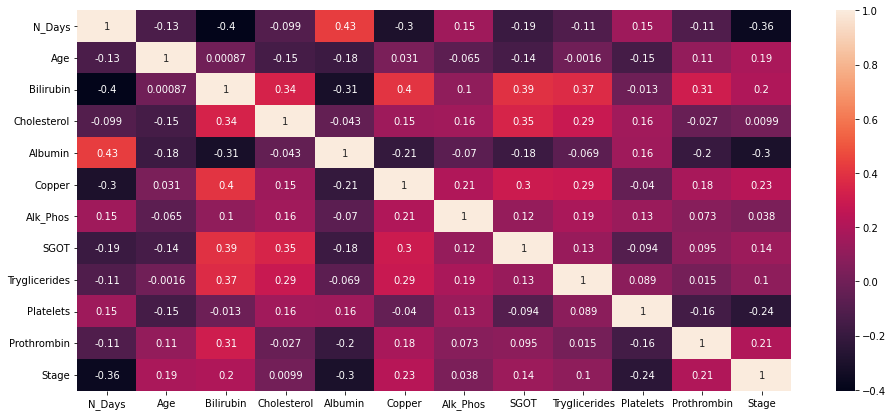

In [ ]:
plt.figure(figsize = (16,7))
df=df.sort_index().reset_index(drop=True)
df
corrMatrix = df.corr()
print (corrMatrix)
sns.heatmap(corrMatrix, annot=True,linewidths=0)
plt.show()

In [ ]:
df['Stage'].value_counts()

3.0    161
4.0    144
2.0     92
1.0     21
Name: Stage, dtype: int64

In [ ]:
stage_corr = df.corr()['Stage'][:-1]
stage_corr

N_Days          -0.362013
Age              0.185296
Bilirubin        0.200314
Cholesterol      0.009930
Albumin         -0.302190
Copper           0.232149
Alk_Phos         0.037905
SGOT             0.143568
Tryglicerides    0.099879
Platelets       -0.239594
Prothrombin      0.205981
Name: Stage, dtype: float64

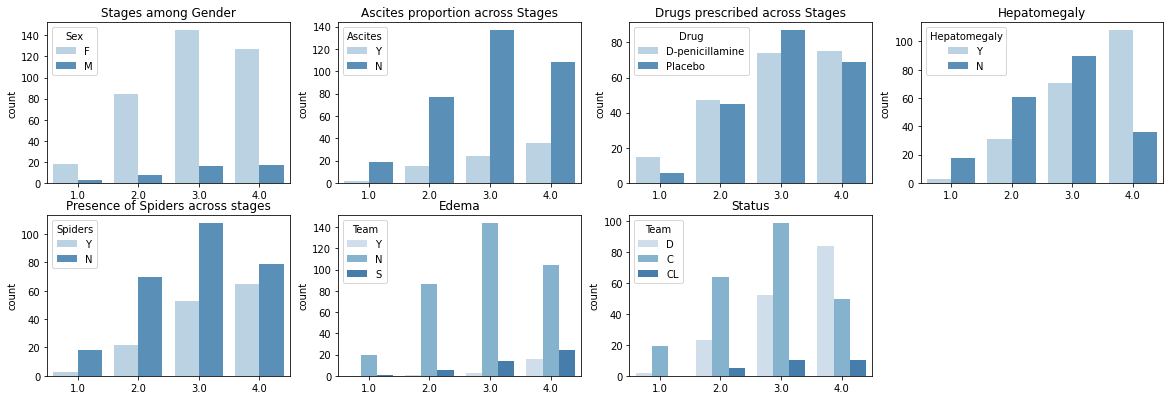

In [ ]:
plt.figure(figsize=(20,6.5))

plt.subplot(2,4,1)
sns.countplot(x=df['Stage'], hue=df['Sex'], palette='Blues', alpha=0.9)
plt.xlabel('')
plt.title('Stages among Gender')

plt.subplot(2,4,2)
sns.countplot(x=df['Stage'], hue=df['Ascites'], palette='Blues', alpha=0.9)
plt.xlabel('')
plt.title('Ascites proportion across Stages')

plt.subplot(2,4,3)
sns.countplot(x=df['Stage'], hue=df['Drug'], palette='Blues', alpha=0.9)
plt.xlabel('')
plt.title('Drugs prescribed across Stages');

plt.subplot(2,4,4)
sns.countplot(x=df['Stage'], hue=df['Hepatomegaly'], palette='Blues', alpha=0.9)
plt.xlabel('')
plt.title('Hepatomegaly');

plt.subplot(2,4,5)
sns.countplot(x=df['Stage'], hue=df['Spiders'], palette='Blues', alpha=0.9)
plt.xlabel('')
plt.title('Presence of Spiders across stages');

plt.subplot(2,4,6)
sns.countplot(x=df['Stage'], hue=df['Edema'], palette='Blues', alpha=0.9)
plt.legend(loc='upper left', title='Team')
plt.xlabel('')
plt.title('Edema');

plt.subplot(2,4,7)
sns.countplot(x=df['Stage'], hue=df['Status'], palette='Blues', alpha=0.9)
plt.legend(loc='upper left', title='Team')
plt.xlabel('')
plt.title('Status');

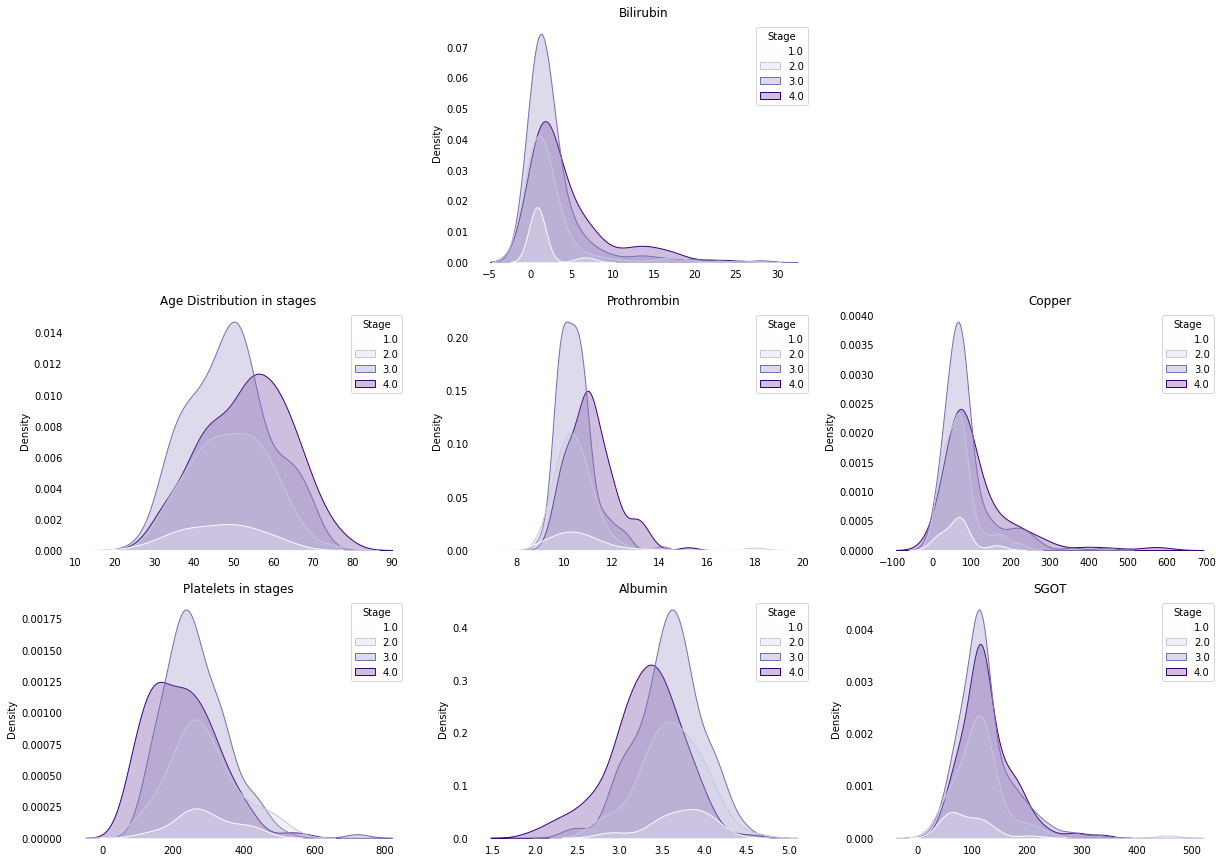

In [ ]:
plt.figure(figsize=(20.6,15))

plt.subplot(3,3,2)
sns.kdeplot(df['Bilirubin'], hue=df['Stage'], fill=True, palette='Purples', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Bilirubin');


plt.subplot(3,3,4)
sns.kdeplot(df['Age'], hue=df['Stage'], fill=True, palette='Purples', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Age Distribution in stages');

plt.subplot(3,3,5)
sns.kdeplot(df['Prothrombin'], hue=df['Stage'], fill=True, palette='Purples', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Prothrombin');

plt.subplot(3,3,6)
sns.kdeplot(df['Copper'], hue=df['Stage'], fill=True, palette='Purples', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Copper');

plt.subplot(3,3,7)
sns.kdeplot(df['Platelets'], hue=df['Stage'], fill=True, palette='Purples')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Platelets in stages');

plt.subplot(3,3,8)
sns.kdeplot(df['Albumin'], hue=df['Stage'], fill=True, palette='Purples', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Albumin');

plt.subplot(3,3,9)
sns.kdeplot(df['SGOT'], hue=df['Stage'], fill=True, palette='Purples', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('SGOT');

In [ ]:
df['Stage'] = np.where(df['Stage'] == 4,1,0)

In [ ]:
df['Stage'].value_counts()

0    274
1    144
Name: Stage, dtype: int64

As we can observe we have classes imbalance in our dataset i.e one class is having more observations than other. This could make it difficult for our model to train and achieve desired score. There are various methods to solve this issue and one of the popular one is resampling methods such as undersampling or oversampling.
However, by performing, undersampling method is difficult because we don't have huge amount of data to remove some of the observations of the majority class and by performing oversampling it leads to overfitting and poor generalisation. We can solve by some other methods which we can work at the performance evaluation process.

Creating dummy values for Categorical variables for enabling the values to be in numeric values to perform further statistical methods.

In [ ]:
df['Sex'] = df['Sex'].replace({'M':1, 'F':0})                                # Male : 0 , Female :1
df['Ascites'] = df['Ascites'].replace({'N':0, 'Y':1})                        # N : 0, Y : 1
df['Drug'] = df['Drug'].replace({'D-penicillamine':0, 'Placebo':1})          # D-penicillamine : 0, Placebo : 1
df['Hepatomegaly'] = df['Hepatomegaly'].replace({'N':0, 'Y':1})              # N : 0, Y : 1
df['Spiders'] = df['Spiders'].replace({'N':0, 'Y':1})                        # N : 0, Y : 1
df['Edema'] = df['Edema'].replace({'N':0, 'Y':1, 'S':-1})                    # N : 0, Y : 1, S : -1
df['Status'] = df['Status'].replace({'C':0, 'CL':1, 'D':-1})                 # 'C':0, 'CL':1, 'D':-1

In [ ]:
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,-1,0,58,0,1,1,1,1,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,1
1,4500,0,0,56,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,0
2,1012,-1,0,70,1,0,0,0,-1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,1
3,1925,-1,0,54,0,0,1,1,-1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,1
4,1504,1,1,38,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,681,-1,1,67,0,1,0,1,0,1.2,309.5,2.96,73.0,1259.0,114.70,108.0,174.0,10.9,0
414,1103,0,0,39,0,0,1,0,0,0.9,309.5,3.83,73.0,1259.0,114.70,108.0,180.0,11.2,1
415,1055,0,1,57,0,1,0,1,0,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,143.0,9.9,0
416,691,0,0,58,0,0,1,0,0,0.8,309.5,3.75,73.0,1259.0,114.70,108.0,269.0,10.4,0


From the above dataframe we delete the N_days and status, as they are not impacting any affect on the stages of the disease.

In [ ]:
X = df.drop(['Status', 'N_Days', 'Stage'], axis=1)
y = df['Stage']

In [ ]:
X

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,0,58,0,1,1,1,1,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2
1,0,56,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6
2,0,70,1,0,0,0,-1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0
3,0,54,0,0,1,1,-1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3
4,1,38,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1,67,0,1,0,1,0,1.2,309.5,2.96,73.0,1259.0,114.70,108.0,174.0,10.9
414,0,39,0,0,1,0,0,0.9,309.5,3.83,73.0,1259.0,114.70,108.0,180.0,11.2
415,1,57,0,1,0,1,0,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,143.0,9.9
416,0,58,0,0,1,0,0,0.8,309.5,3.75,73.0,1259.0,114.70,108.0,269.0,10.4


In [ ]:
y

0      1
1      0
2      1
3      1
4      0
      ..
413    0
414    1
415    0
416    0
417    1
Name: Stage, Length: 418, dtype: int64

###Data Partitioning

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=2)

scaler = StandardScaler()
X_train_sc=scaler.fit_transform(X_train)
X_test_Sc=scaler.transform(X_test)

To model Machine Learning algorithms on the dataset, i.e; train and test the dataset we need to standardize our data such that all the variables needs be in the same unit to measure.

In [ ]:
X_train_sc

array([[-0.97296797, -1.21196664, -0.36903492, ..., -0.16497429,
        -1.17051397,  0.13362345],
       [-0.97296797, -0.09234336, -0.36903492, ..., -0.56717347,
         0.09044137, -0.15397887],
       [ 1.02778306,  1.2138838 , -0.36903492, ..., -0.18325607,
        -1.19085196, -0.24984631],
       ...,
       [ 1.02778306, -1.21196664, -0.36903492, ..., -1.13390868,
         0.09044137,  0.2294909 ],
       [ 1.02778306, -1.02536276, -0.36903492, ..., -1.09734512,
        -0.59088127,  0.03775601],
       [ 1.02778306, -1.49187246, -0.36903492, ...,  0.34691558,
         0.39551121, -0.63331608]])

In [ ]:
X_test_Sc

array([[-9.72967968e-01,  2.24020514e+00, -3.69034918e-01, ...,
        -7.35653858e-02, -4.38346355e-01, -5.81114287e-02],
       [-9.72967968e-01, -1.21196664e+00, -3.69034918e-01, ...,
        -3.11228538e-01,  5.37877131e-01, -1.01678585e+00],
       [-9.72967968e-01, -6.52154999e-01, -3.69034918e-01, ...,
        -1.13390868e+00,  8.12439986e-01, -1.59199050e+00],
       ...,
       [ 1.02778306e+00,  9.58581576e-04, -3.69034918e-01, ...,
         1.22444106e+00,  4.97653882e-02, -7.29183521e-01],
       [-9.72967968e-01, -4.65551119e-01, -3.69034918e-01, ...,
        -1.83256072e-01,  3.95963935e-02, -3.45713754e-01],
       [-9.72967968e-01, -1.02536276e+00, -3.69034918e-01, ...,
        -6.22018815e-01,  4.87032158e-01, -8.25050963e-01]])

#Model Exploration and Model Selection
As our ojective is to classify the new observations based on the existing observations to its class by various classification machine learning algorithms. Some of them are

1.KNN-Classifier

2.Decision Tree Classifier

3.Random Forest Classifier

4.Logistic Regression


#Implementation of Selected models

1.KNN-Classifier

In [ ]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_sc, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_pred_knn=knn.predict(X_test_Sc)

#Performance Evaluation Metrics

In [ ]:
print("Accuracy score of KNN classifier is :",accuracy_score(y_test,y_pred_knn))

Accuracy score of KNN classifier is : 0.8174603174603174


In [ ]:
results = []
for k in range(1, 16):
  knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_sc, y_train)
  results.append({
    'k': k,
    'accuracy': accuracy_score(y_test, knn.predict(X_test_Sc))
  })
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1  0.730159
1    2  0.785714
2    3  0.730159
3    4  0.817460
4    5  0.801587
5    6  0.801587
6    7  0.777778
7    8  0.785714
8    9  0.761905
9   10  0.738095
10  11  0.761905
11  12  0.769841
12  13  0.809524
13  14  0.746032
14  15  0.793651


In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix_knn=confusion_matrix(y_test,y_pred_knn)
cf_matrix_knn

array([[83,  7],
       [16, 20]])

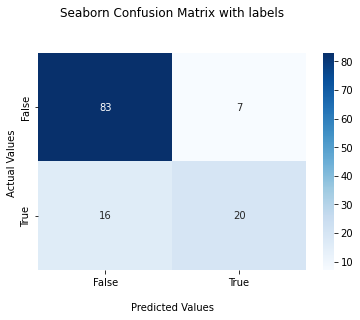

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(cf_matrix_knn, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Precision indicates out of all positive predictions, how many are actually positive. It is defined as a ratio of correct positive predictions to overall positive predictions.

In [ ]:
from sklearn.metrics import precision_score
print('Precision: %.3f' % precision_score(y_test, y_pred_knn))

Precision: 0.741


Recall indicates out of all actually positive values, how many are predicted positive. It is a ratio of correct positive predictions to the overall number of positive instances in the dataset.

In [ ]:
from sklearn.metrics import recall_score
print('Recall: %.3f' % recall_score(y_test, y_pred_knn))

Recall: 0.556


When avoiding both false positives and false negatives are equally important for our problem, we need a trade-off between precision and recall. This is when we use the f1 score as a metric. An f1 score is defined as the harmonic mean of precision and recall.

In [ ]:
from sklearn.metrics import f1_score
print('F1 Score: %.3f' % f1_score(y_test, y_pred_knn))

F1 Score: 0.635


Classification Report for KNN Classifier

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_knn)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88        90
           1       0.74      0.56      0.63        36

    accuracy                           0.82       126
   macro avg       0.79      0.74      0.76       126
weighted avg       0.81      0.82      0.81       126



We use the receiver operating curve to check model performance. Wikipedia defines ROC as: “A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied”.

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import auc
import matplotlib.pyplot as plt
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred_knn)
roc_auc = auc(false_positive_rate1, true_positive_rate1)
print('roc_auc_score for KNN classifier: ', roc_auc_score(y_test, y_pred_knn))

roc_auc_score for KNN classifier:  0.7388888888888889


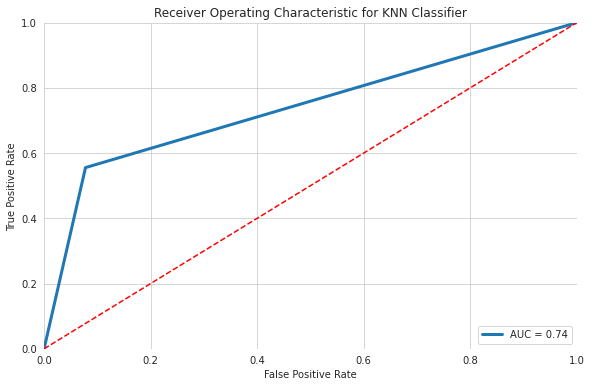

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(21,6))

plt.subplot(1,2,1)
plt.title('Receiver Operating Characteristic for KNN Classifier')
sns.lineplot(x=false_positive_rate1, y=true_positive_rate1, label = 'AUC = %0.2f' % roc_auc, palette='purple', linewidth=3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tick_params(left=False, bottom=False)
sns.despine(top=True, bottom=True, left=True)

2.Decision Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
#from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

In [ ]:
clf = DecisionTreeClassifier(max_depth = 5,random_state=1,min_samples_split=2)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [ ]:
y_pred_tree=clf.predict(X_test)

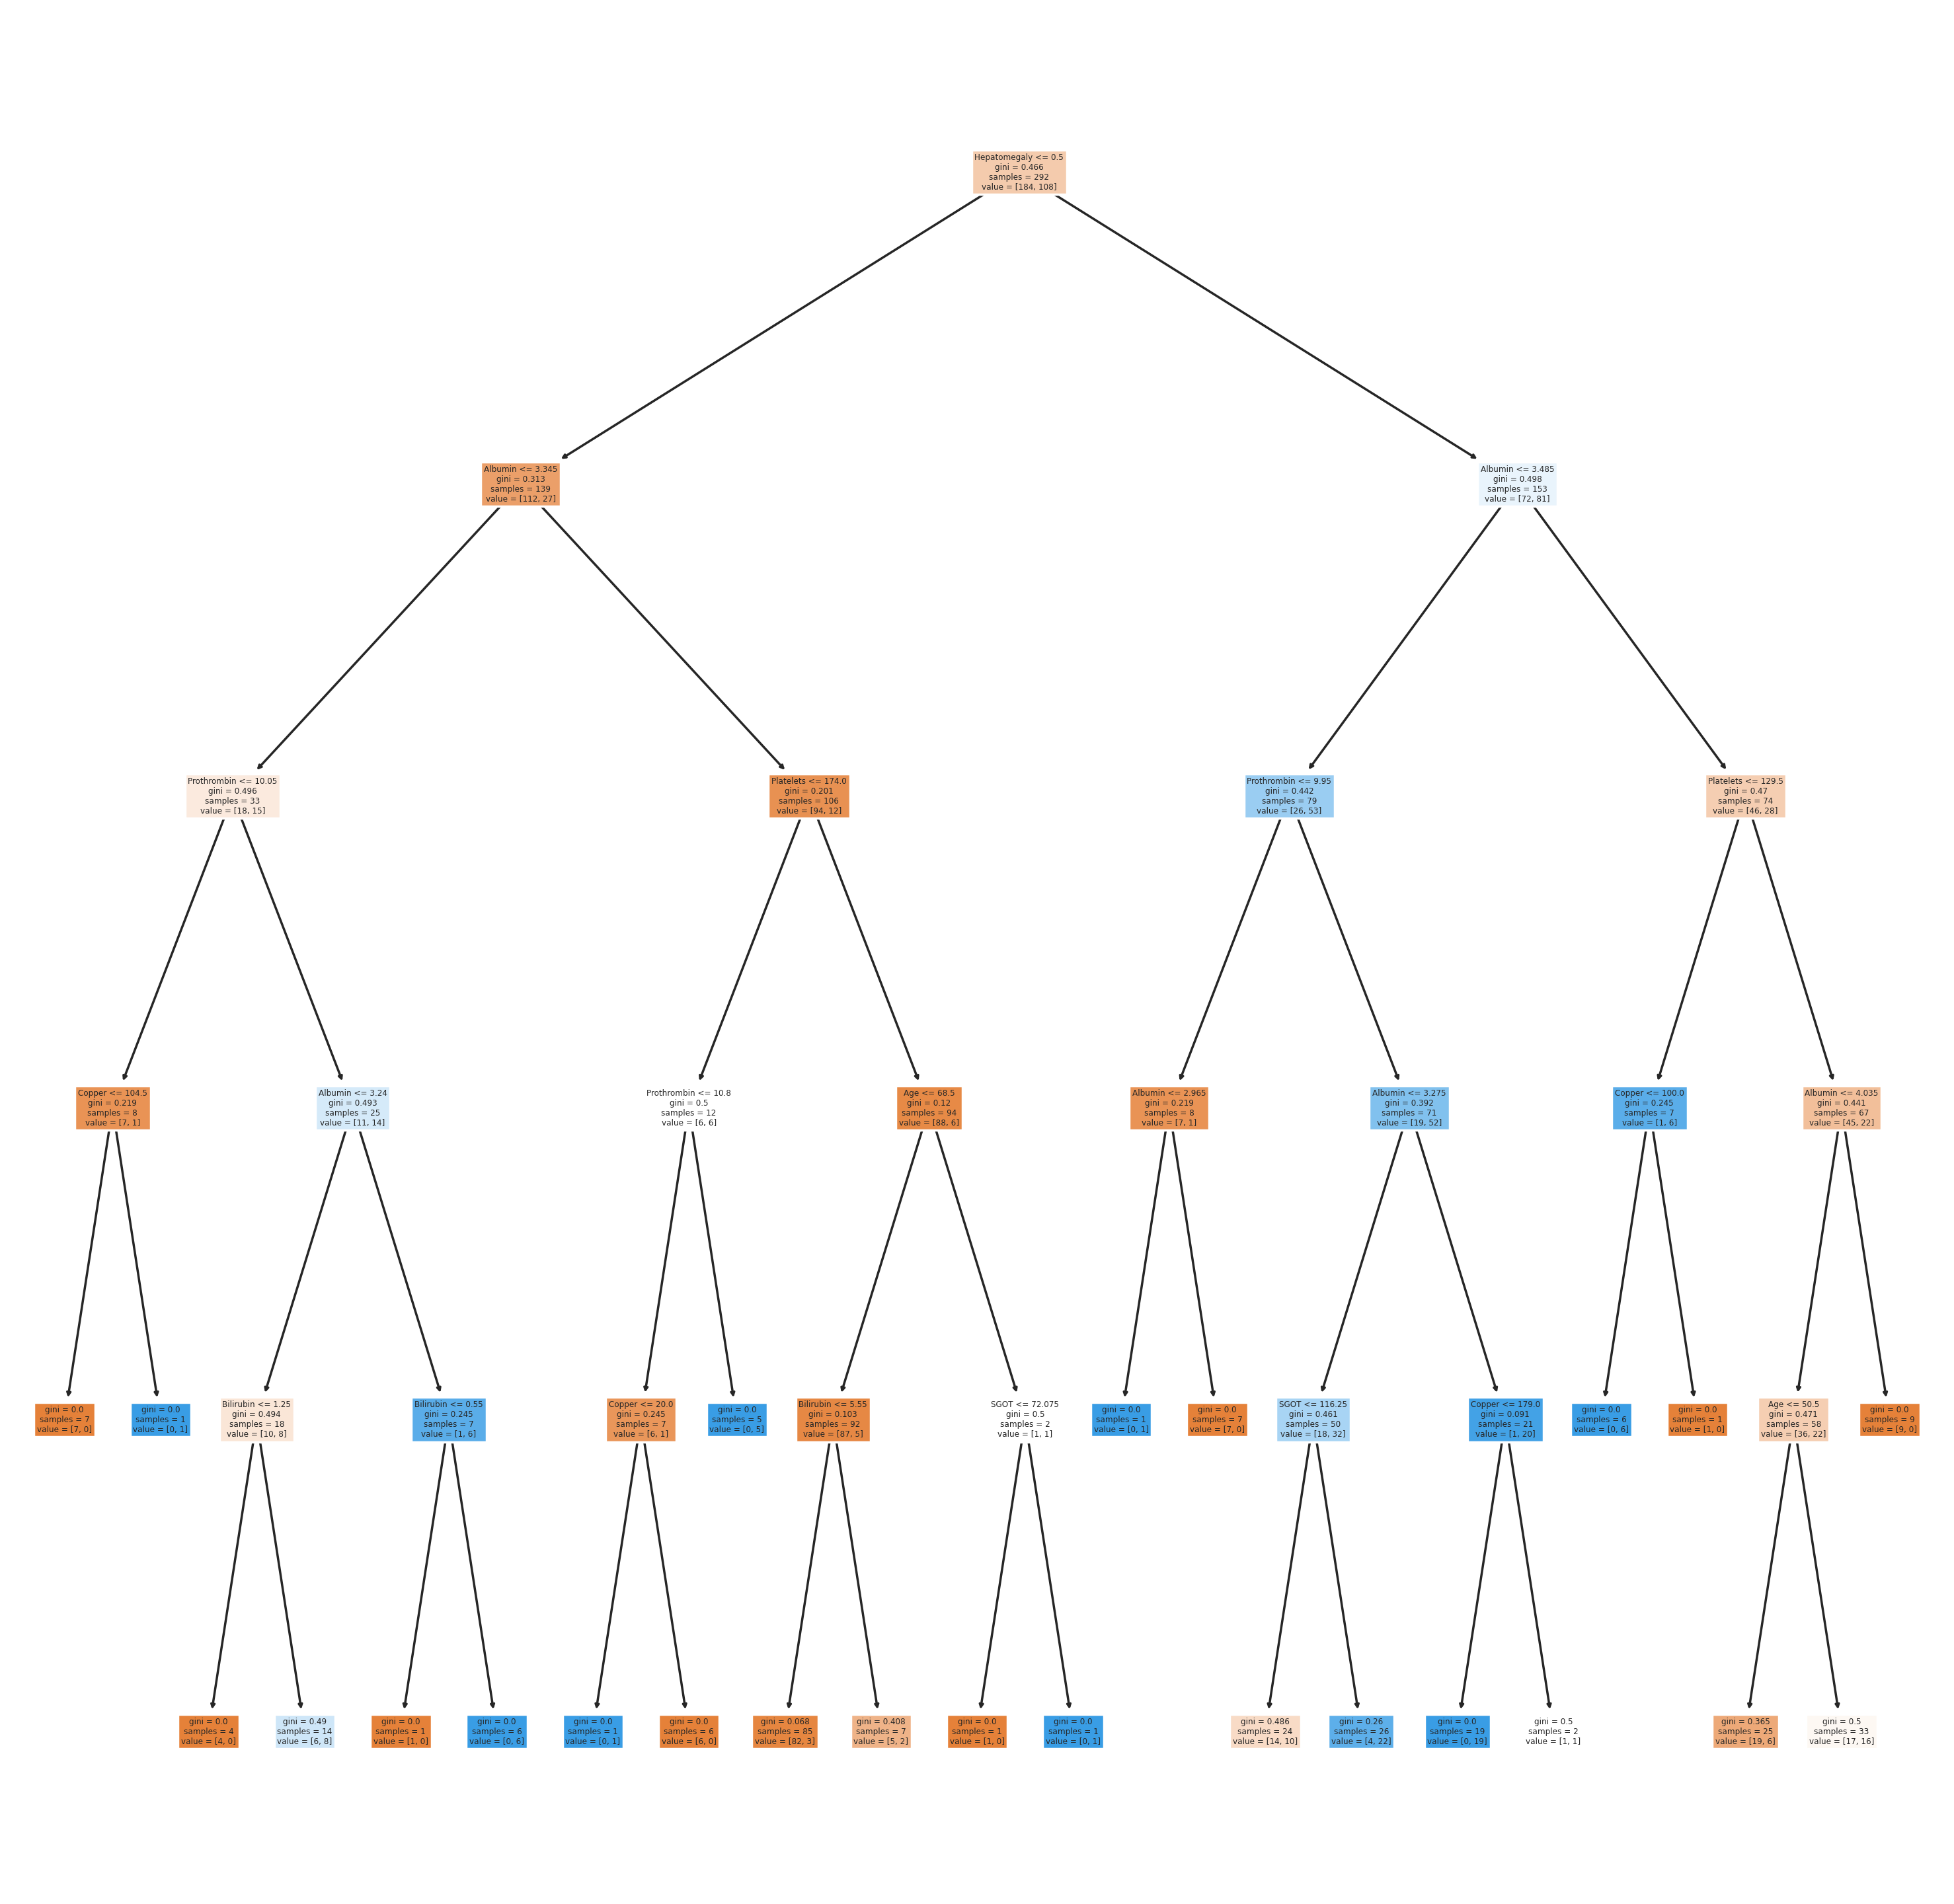

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=250)
fn=X.columns
tree.plot_tree(clf,
               feature_names = fn,
               #class_names=cn,
               filled = True);

In [ ]:
y_pred_tree=clf.predict(X_test)

In [ ]:
print("Accuracy score is :",accuracy_score(y_test,y_pred_tree))

Accuracy score is : 0.7857142857142857


In [ ]:
results = []
for i in range(1, 7):
  clf = DecisionTreeClassifier(max_depth = i,random_state=1,min_samples_split=2).fit(X_train, y_train)
  results.append({
    'max_depth': i,
    'accuracy': accuracy_score(y_test, clf.predict(X_test))
  })
results = pd.DataFrame(results)
print(results)

   max_depth  accuracy
0          1  0.666667
1          2  0.714286
2          3  0.738095
3          4  0.738095
4          5  0.785714
5          6  0.714286


In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_test,y_pred_tree)
cf_matrix

array([[79, 11],
       [16, 20]])

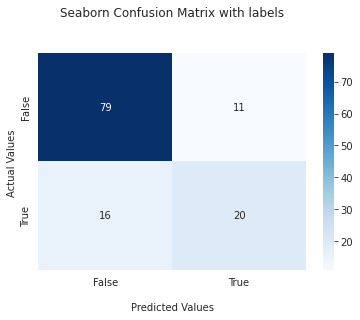

In [ ]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import precision_score #True positives or Sensitivity when
print('Precision: %.3f' % precision_score(y_test, y_pred_tree))

Precision: 0.645


In [ ]:
from sklearn.metrics import recall_score
print('Recall: %.3f' % recall_score(y_test, y_pred_tree))

Recall: 0.556


In [ ]:
from sklearn.metrics import f1_score
print('F1 Score: %.3f' % f1_score(y_test, y_pred_tree))

F1 Score: 0.597


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_tree)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        90
           1       0.65      0.56      0.60        36

    accuracy                           0.79       126
   macro avg       0.74      0.72      0.73       126
weighted avg       0.78      0.79      0.78       126



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
false_positive_rate2, true_positive_rate2, threshold1 = roc_curve(y_test, y_pred_tree)
roc_auc = auc(false_positive_rate2, true_positive_rate2)
print('roc_auc_score for DecisionTree Classifier: ', roc_auc_score(y_test, y_pred_tree))

roc_auc_score for DecisionTree Classifier:  0.7166666666666667


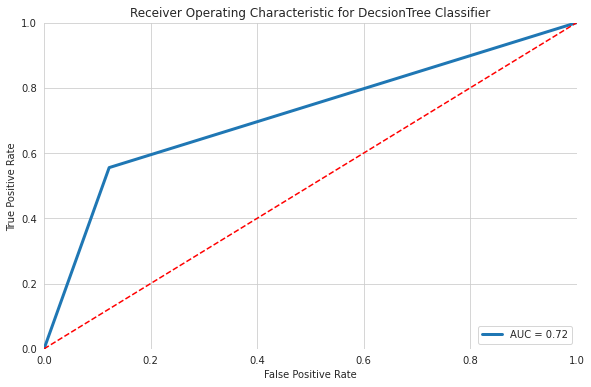

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(21,6))

plt.subplot(1,2,1)
plt.title('Receiver Operating Characteristic for DecsionTree Classifier')
sns.lineplot(x=false_positive_rate2, y=true_positive_rate2, label = 'AUC = %0.2f' % roc_auc, palette='purple', linewidth=3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tick_params(left=False, bottom=False)
sns.despine(top=True, bottom=True, left=True)


3.Logistic Regression

The stratified k fold cross-validation is an extension of the cross-validation technique used for classification problems. It maintains the same class ratio throughout the K folds as the ratio in the original dataset.

In [ ]:
# 5 folds selected
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
kfold = KFold(n_splits=8, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, y, cv=kfold)
# Output the accuracy. Calculate the mean and std across all folds.
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 74.152% (5.127%)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predicted = model.predict(X_test)
matrix_log1 = confusion_matrix(y_test, predicted)
print(matrix_log1)

[[79 11]
 [15 21]]


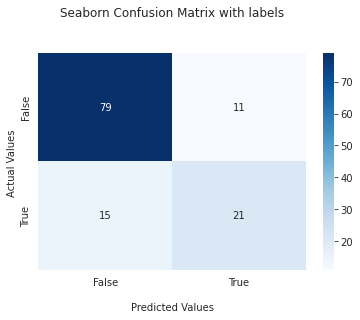

In [ ]:
ax = sns.heatmap(matrix_log1, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import precision_score #True positives or Sensitivity when
print('Precision: %.3f' % precision_score(y_test, predicted))

Precision: 0.656


In [ ]:
from sklearn.metrics import recall_score
print('Recall: %.3f' % recall_score(y_test, predicted))

Recall: 0.583


In [ ]:
from sklearn.metrics import f1_score
print('F1 Score: %.3f' % f1_score(y_test, predicted))

F1 Score: 0.618


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        90
           1       0.66      0.58      0.62        36

    accuracy                           0.79       126
   macro avg       0.75      0.73      0.74       126
weighted avg       0.79      0.79      0.79       126



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
false_positive_rate3, true_positive_rate3, threshold1 = roc_curve(y_test, predicted)
roc_auc = auc(false_positive_rate3, true_positive_rate3)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, predicted))

roc_auc_score for Logistic Regression:  0.7305555555555556


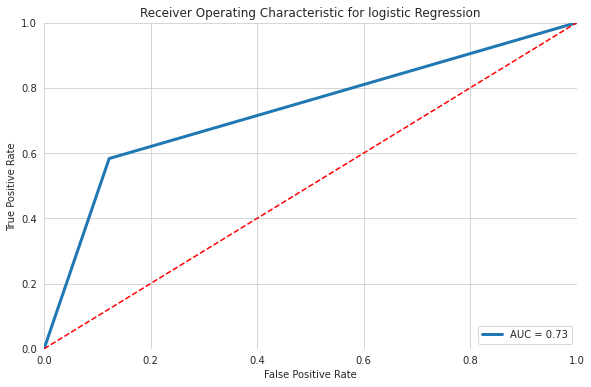

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(21,6))

plt.subplot(1,2,1)
plt.title('Receiver Operating Characteristic for logistic Regression')
sns.lineplot(x=false_positive_rate3, y=true_positive_rate3, label = 'AUC = %0.2f' % roc_auc, palette='purple', linewidth=3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tick_params(left=False, bottom=False)
sns.despine(top=True, bottom=True, left=True)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
rf_pred = model_rf.predict(X_test)

In [ ]:
print("Accuracy score is :",accuracy_score(y_test,rf_pred))

Accuracy score is : 0.8253968253968254


In [ ]:
matrix_randf = confusion_matrix(y_test, rf_pred)
print(matrix_randf)

[[86  4]
 [15 21]]


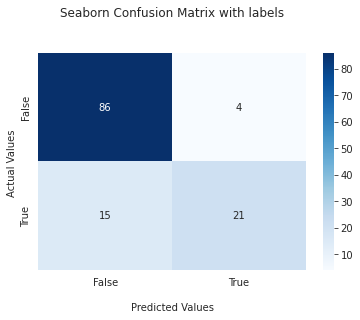

In [ ]:
ax = sns.heatmap(matrix_randf, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import precision_score #True positives or Sensitivity when
print('Precision: %.3f' % precision_score(y_test, rf_pred))

Precision: 0.840


In [ ]:
from sklearn.metrics import recall_score
print('Recall: %.3f' % recall_score(y_test, rf_pred))

Recall: 0.583


In [ ]:
from sklearn.metrics import f1_score
print('F1 Score: %.3f' % f1_score(y_test, rf_pred))

F1 Score: 0.689


In [ ]:
report = classification_report(y_test, rf_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        90
           1       0.85      0.47      0.61        36

    accuracy                           0.83       126
   macro avg       0.84      0.72      0.75       126
weighted avg       0.83      0.83      0.81       126



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import auc
import matplotlib.pyplot as plt
false_positive_rate4, true_positive_rate4, threshold1 = roc_curve(y_test, rf_pred)
roc_auc = auc(false_positive_rate4, true_positive_rate4)
print('roc_auc_score for Random forest Classifier: ', roc_auc_score(y_test, rf_pred))

roc_auc_score for Random forest Classifier:  0.7194444444444446


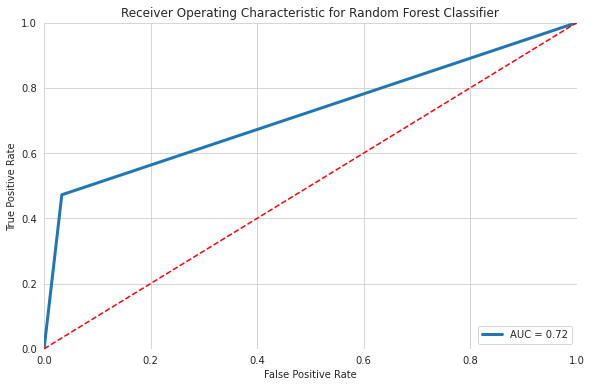

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(21,6))

plt.subplot(1,2,1)
plt.title('Receiver Operating Characteristic for Random Forest Classifier')
sns.lineplot(x=false_positive_rate4, y=true_positive_rate4, label = 'AUC = %0.2f' % roc_auc, palette='purple', linewidth=3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tick_params(left=False, bottom=False)
sns.despine(top=True, bottom=True, left=True)

Grid Search CV

In [ ]:
rfc=RandomForestClassifier(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 500}

In [ ]:
rfc1=RandomForestClassifier(random_state=10,criterion='entropy',max_depth= 7,max_features= 'auto',n_estimators= 500)

In [ ]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=500,
                       random_state=10)

In [ ]:
pred=rfc1.predict(X_test)

In [ ]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.8333333333333334


In [ ]:
matrix_randf1 = confusion_matrix(y_test, pred)
print(matrix_randf1)

[[85  5]
 [16 20]]


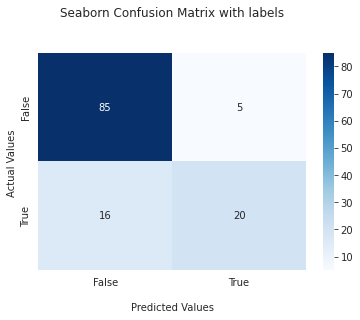

In [ ]:
ax = sns.heatmap(matrix_randf1, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import precision_score #True positives
print('Precision: %.3f' % precision_score(y_test, pred))

Precision: 0.800


In [ ]:
from sklearn.metrics import recall_score
print('Recall: %.3f' % recall_score(y_test, pred))

Recall: 0.556


In [ ]:
from sklearn.metrics import f1_score
print('F1 Score: %.3f' % f1_score(y_test, pred))

F1 Score: 0.656


In [ ]:
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        90
           1       0.80      0.56      0.66        36

    accuracy                           0.83       126
   macro avg       0.82      0.75      0.77       126
weighted avg       0.83      0.83      0.82       126



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
false_positive_rate5, true_positive_rate5, threshold1 = roc_curve(y_test, pred)
roc_auc = auc(false_positive_rate5, true_positive_rate5)
print('roc_auc_score for Random forest Classifier: ', roc_auc_score(y_test, pred))

roc_auc_score for Random forest Classifier:  0.75


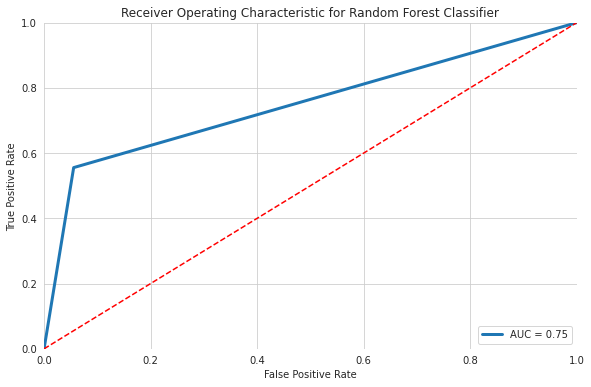

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(21,6))

plt.subplot(1,2,1)
plt.title('Receiver Operating Characteristic for Random Forest Classifier')
sns.lineplot(x=false_positive_rate5, y=true_positive_rate5, label = 'AUC = %0.2f' % roc_auc, palette='purple', linewidth=3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tick_params(left=False, bottom=False)
sns.despine(top=True, bottom=True, left=True)

In [ ]:
pip install shap

     |████████████████████████████████| 564 kB 8.7 MB/s 


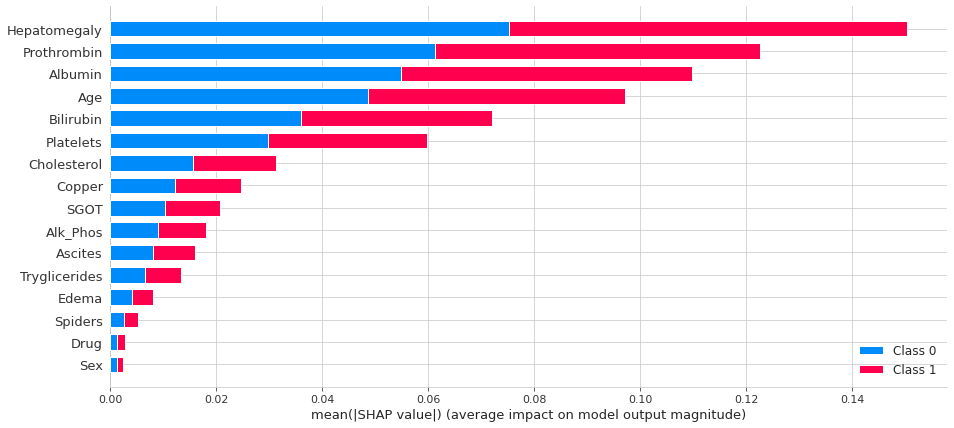

In [ ]:
import shap
explainer = shap.TreeExplainer(rfc1)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_train, plot_size=(15,7), alpha=0.2, plot_type='bar')